<a href="https://colab.research.google.com/github/DarainHyder/BuildablesDataScienceFellowship/blob/main/Week_8%5CDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libs

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Load and Preprocess Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Model Architecture

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

## Compile, Train, and Evaluate

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8569 - loss: 0.4824 - val_accuracy: 0.9692 - val_loss: 0.1082
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9678 - loss: 0.1077 - val_accuracy: 0.9750 - val_loss: 0.0879
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9772 - loss: 0.0715 - val_accuracy: 0.9773 - val_loss: 0.0764
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9829 - loss: 0.0544 - val_accuracy: 0.9822 - val_loss: 0.0629
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9856 - loss: 0.0424 - val_accuracy: 0.9810 - val_loss: 0.0708
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9867 - loss: 0.0392 - val_accuracy: 0.9815 - val_loss: 0.0695
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9916 - loss: 0.0268 - val_accuracy: 0.9817 - val_loss: 0.0675
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9911 - loss: 0.0264 - val_ac

## Visualization

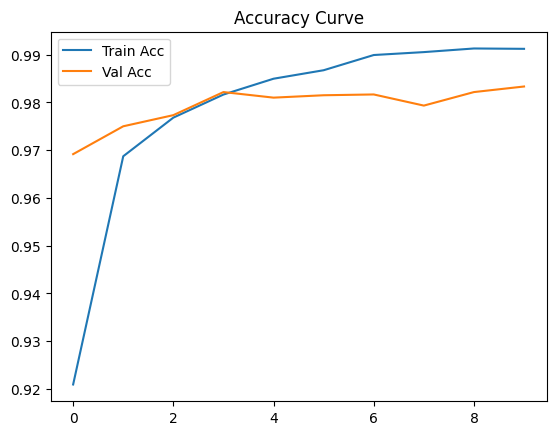

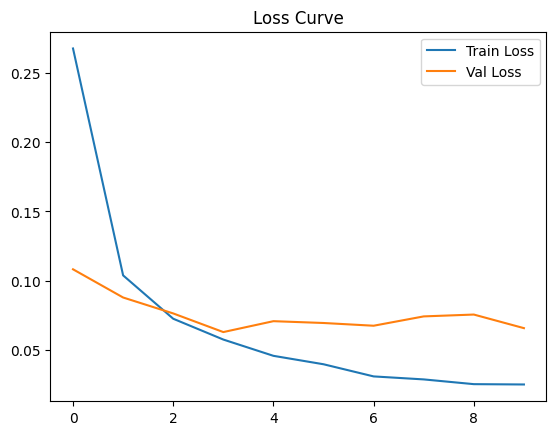

In [5]:
import matplotlib.pyplot as plt
# Accuracy and loss plots
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy Curve"); plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss Curve"); plt.show()

## Confusion Matrix & Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


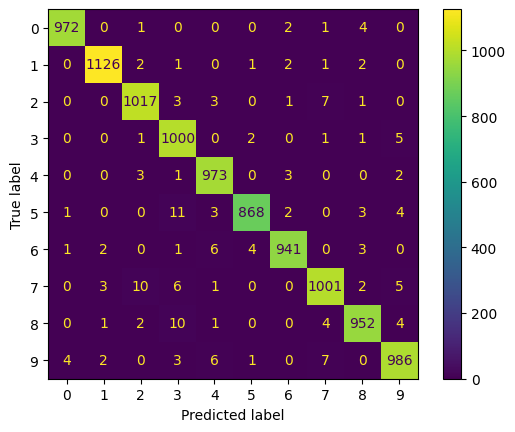

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
ConfusionMatrixDisplay(cm).plot()

## Sample Predictions

Predicted Label: 7


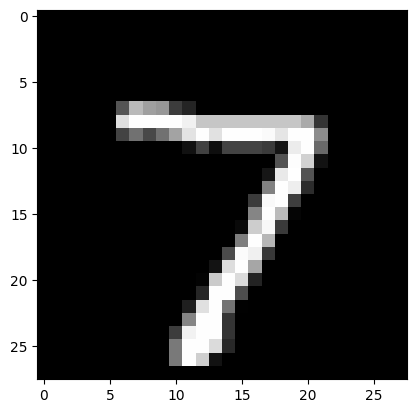

In [7]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
print("Predicted Label:", np.argmax(y_pred[0]))

## Model Diagram

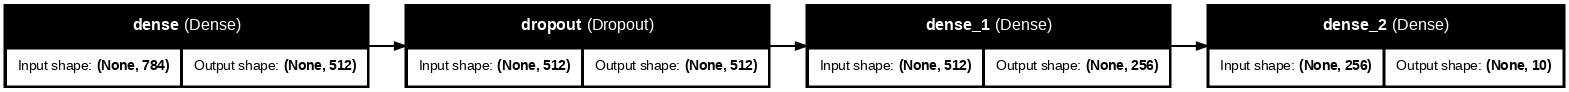

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file='model_small.png',
    show_shapes=True,
    show_layer_names=True,
    dpi=72,             # (default is ~96)
    rankdir='LR'        # Keeps horizontal layout
)